In [1]:
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 머신러닝 패키지 추가
import statsmodels.api as sm
import sklearn as sk


In [3]:
# 한글 폰트, 마이너스 
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

In [4]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
                        21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
                        23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
                        27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
                        39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
                        44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
                        115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
                        150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
                        218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
                        556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
                        850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
                        1000.0])

In [5]:
from sklearn.model_selection import train_test_split

# 훈련세트 / 테스트세트 분리
train_input,test_input,train_target,test_target = train_test_split(perch_length,perch_weight,random_state=42)

In [7]:
# 훈련입력 세트 / 테스트 입력세트
new_train_input = np.row_stack((train_input))
new_test_input = np.row_stack((test_input))

In [67]:
new_test_input

array([[ 8.4],
       [18. ],
       [27.5],
       [21.3],
       [22.5],
       [40. ],
       [30. ],
       [24.6],
       [39. ],
       [21. ],
       [43.5],
       [16.2],
       [28. ],
       [27.3]])

In [8]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)

In [9]:
# 훈련세트로 훈련
knr.fit(X=new_train_input,y=train_target)

KNeighborsRegressor(n_neighbors=3)

In [10]:
# 결정계수 확인
knr.score(X=new_train_input,y=train_target)

0.9804899950518966

In [11]:
knr.score(X=new_test_input,y=test_target)

0.9746459963987609

In [13]:
# 길이가 50cm일때 무게가 얼마인가?
knr.predict([[50.0]])

array([1033.33333333])

#### ? anrprk 1500g이 넘는데
머신러닝 모델은 1033g으로 예측

##### 훈련세트에 대한 산점도

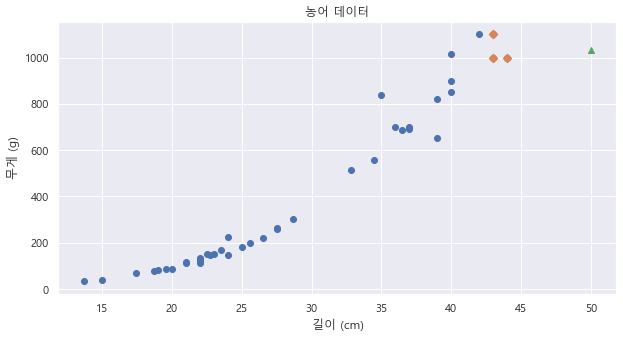

In [21]:
# 길이가 50cm 농어에 대한 이웃값 3개
dist,inds = knr.kneighbors([[50.0]])

plt.figure(figsize=(10,5))
plt.scatter(x=new_train_input,y=train_target)
plt.scatter(x=new_train_input[inds],y=train_target[inds],marker='D')
plt.scatter(x=50,y=knr.predict([[50]])[0],marker='^')
plt.title('농어 데이터')
plt.xlabel('길이 (cm)')
plt.ylabel('무게 (g)')
plt.show()

In [22]:
np.mean(train_target[inds])

1033.3333333333333

In [24]:
# 길이를 늘려도 위에 값과 같이 나옴
knr.predict(X=[[1000]])

array([1033.33333333])

이웃된 값의 데이터가 충분하지 못하다

In [25]:
from sklearn.linear_model import LinearRegression

In [32]:
lr = LinearRegression()

# 선형 회귀모델 훈련
lr.fit(X=new_train_input,y=train_target)

LinearRegression()

In [35]:
# 훈련데이터로 결정계수 확인
lr.score(X=new_train_input,y=train_target)

0.9398463339976041

In [36]:
# 테스트데이터로 결정계수 확인
lr.score(X=new_test_input,y=test_target)

0.824750312331356

In [39]:
# 길이 50cm 예측
lr.predict([[50.0]])
# 1033.333(KNN) vs 1241.8386(Linear Reg)

array([1241.83860323])

In [40]:
print(lr.coef_,lr.intercept_)

[39.01714496] -709.0186449535474


- ceof_ (계수) = 가중치 (weight) = 기울기
- intercept_ (절편) = 잔차 (error)

##### Linear Regression 산점도

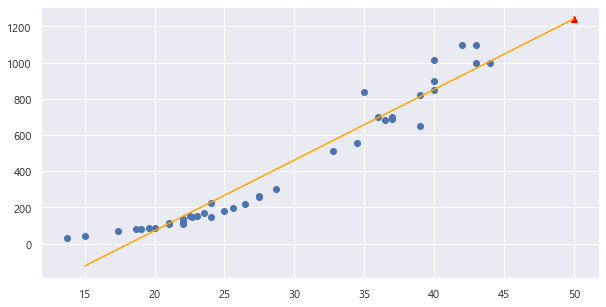

In [49]:
plt.figure(figsize=(10,5))
plt.scatter(x=new_train_input,y=train_target)
plt.scatter(x=50,y=lr.predict([[50]]),marker='^',color='red')

# 1차 방정식 선그래프
plt.plot([15,50],[15*lr.coef_+lr.intercept_,50*lr.coef_+lr.intercept_],color='orange')
plt.show()

In [50]:
train_poly = np.column_stack((train_input**2,train_input))
test_poly = np.column_stack((test_input**2,test_input))

In [52]:
print(train_poly.shape,test_poly.shape)

(42, 2) (14, 2)


다항 선형회귀

In [53]:
lr = LinearRegression()
lr.fit(X=train_poly,y=train_target)

LinearRegression()

In [54]:
# 훈련 데이터로 결정계수 확인
lr.score(X=train_poly,y=train_target)

0.9706807451768623

In [55]:
# 테스트 데이터로 결정계수 확인
lr.score(X=test_poly,y=test_target)

0.9775935108325122

In [56]:
# 길이 50cm 농어의 무게 예측
# 길이의 제곱, 길이
lr.predict([[50.0**2,50.0]])
# 농어의 무게 예측 = 1573.9842

array([1573.98423528])

In [57]:
print(lr.coef_,lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


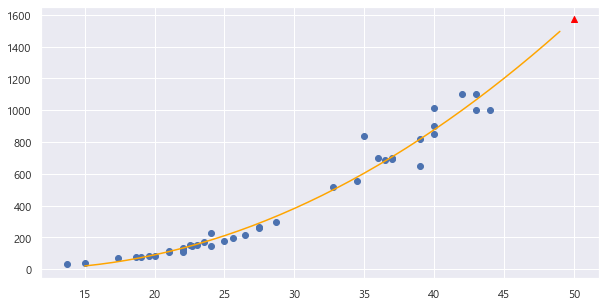

In [65]:
point = np.arange(15,50)

plt.figure(figsize=(10,5))
plt.scatter(x=new_train_input,y=train_target)

# 15~49 까지의 2차 방정식 그림
plt.plot(point,lr.coef_[0]*(point**2)+lr.coef_[1]*point+lr.intercept_,color='orange')
plt.scatter(x=[50.0],y=lr.predict([[50.0**2,50.0]]),marker='^',color='red')
plt.show()